In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd

In [3]:
tinit_train = pd.read_csv('tinit_train.csv')
tinit_test = pd.read_csv('tinit_test.csv')
wavefake_train = pd.read_csv('wavefake_train.csv')
wavefake_test = pd.read_csv('wavefake_test.csv')

In [4]:
train_x = pd.concat([
    pd.read_csv('tinit_train_x.csv', header=None),
    pd.read_csv('wavefake_train_x.csv', header=None)
])

train_y = pd.concat([tinit_train['fake'], wavefake_train['fake']])

test_x = pd.concat([
    pd.read_csv('tinit_test_x.csv', header=None),
    pd.read_csv('wavefake_test_x.csv', header=None)
])
test_y = pd.concat([tinit_test['fake'], wavefake_test['fake']])

In [6]:
X = train_x

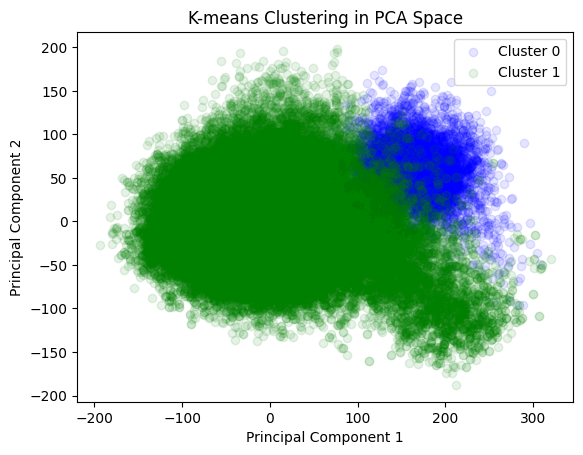

In [11]:
# Perform dimensionality reduction using PCA
n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

for i in range(2):
    plt.scatter(X_pca[train_y == i, 0], X_pca[train_y == i, 1], c=colors[i], label=f'Cluster {i}', alpha=0.1)
plt.legend()
plt.title('K-means Clustering in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
# Apply K-means clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(X_pca)
labels = kmeans.labels_

# Create a scatter plot to visualize the data and clusters
plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for i in range(n_clusters):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], c=colors[i], label=f'Cluster {i}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='x', label='Centroids')
plt.legend()
plt.title('K-means Clustering in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()